In [1]:
import sys
import logging
import gym
from gym import spaces

from cyberbattle.h_env import nodes, ENV_IDENTIFIERS
import cyberbattle.simulation.model as model
import cyberbattle.simulation.commandcontrol as commandcontrol
import cyberbattle._env.cyberbattle_env as cyberbattle_env

import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
network = model.create_network(nodes)
env = model.Environment(network=network, vulnerability_library=dict([]), identifiers=ENV_IDENTIFIERS)

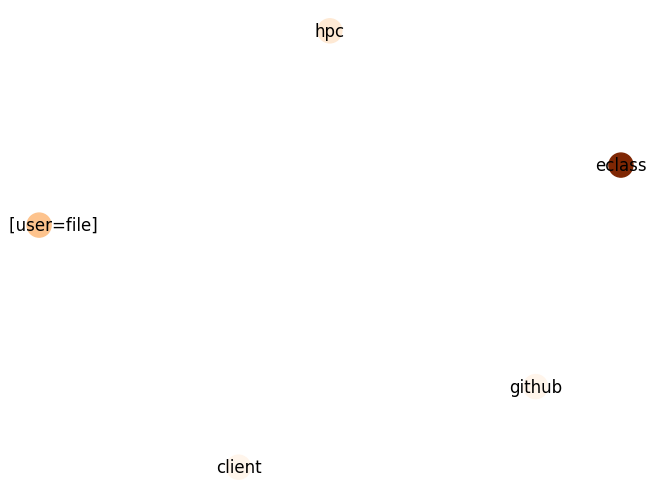

In [3]:
env.plot_environment_graph()

In [4]:
c2 = commandcontrol.CommandControl(env)
dbg = commandcontrol.EnvironmentDebugging(c2)
def plot():
    dbg.plot_discovered_network()
    c2.print_all_attacks()
plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]


In [5]:
c2.run_attack('client', 'SearchSshConnection')
plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]
hpc,discovered,NaN,None,[]


In [6]:
c2.run_attack('client', 'SearchInternetConnection')
plot()
print(c2.credentials_gathered_so_far)

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]
hpc,discovered,NaN,None,[]
eclass,discovered,NaN,None,[]
github,discovered,NaN,None,"[CredScanGitHistorySudo, CredScanGitHistorySu]"


set()


In [7]:
c2.run_attack('client', 'CredScanBashHistory')
plot()
print(c2.credentials_gathered_so_far)

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]
hpc,discovered,NaN,None,[]
eclass,discovered,NaN,None,[]
github,discovered,NaN,None,"[CredScanGitHistorySudo, CredScanGitHistorySu]"


{CachedCredential(node='hpc', port='SSH', credential='SshCred')}


In [8]:
c2.connect_and_infect('client', 'hpc', 'SSH', 'SshCred')
plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]
hpc,owned,[Ubuntu],"[CredScanBashHistory, SearchInternetCookie]",[]
eclass,discovered,NaN,None,[]
github,discovered,NaN,None,"[CredScanGitHistorySudo, CredScanGitHistorySu]"


In [9]:
c2.run_attack('hpc', 'SearchInternetCookie')
plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]
hpc,owned,[Ubuntu],"[CredScanBashHistory, SearchInternetCookie]",[]
eclass,discovered,NaN,None,[]
github,discovered,NaN,None,"[CredScanGitHistorySudo, CredScanGitHistorySu]"
hpc[user=file],discovered,NaN,None,[]


In [10]:
c2.run_attack('hpc', 'CredScanBashHistory')
plot()

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[Window],"[CredScanBashHistory, SearchInternetConnection...",[]
hpc,owned,[Ubuntu],"[CredScanBashHistory, SearchInternetCookie]",[]
eclass,discovered,NaN,None,[]
github,discovered,NaN,None,"[CredScanGitHistorySudo, CredScanGitHistorySu]"
hpc[user=file],discovered,NaN,None,[]


In [11]:
c2.run_attack('hpc', 'SearchInternetConnection') # can't get eclass cred
c2.connect_and_infect('client', 'eclass', 'HTTPS', 'EclassSessionID')
plot()

ValueError: Agent has not discovered credential 'EclassSessionID'

In [ ]:
c2.run_remote_attack('client', 'github', 'CredScanGitHistorySudo')
c2.run_remote_attack('client', 'github', 'CredScanGitHistorySu')
plot()

In [ ]:
c2.connect_and_infect('hpc', 'hpc[user=file]', 'su', 'UserSudoPassword') # can't infect with su-command ( not root user )
plot()

In [ ]:
c2.connect_and_infect('hpc', 'hpc[user=file]', 'sudo', 'RootSudoPassword')
plot()

In [ ]:
c2.run_attack('hpc[user=file]', 'NavigateBrowserCookie')
plot()

In [ ]:
c2.connect_and_infect('client', 'eclass', 'HTTPS', 'EclassSessionID')
plot()